In [23]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [28]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

#Read data for analysis
train = pd.read_csv("D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/DataChallenge 2/train.csv")
#print(x_train.shape)
#x_train.head()
test = pd.read_csv("D:/Users/Ziqiu/OneDrive/Documents/University Docs/Stat441/DataChallenge 2/test.csv")

In [8]:
print('Training Data Dimension:')
print('Number of Records:', train.shape[0])
print('Number of Features:', train.shape[1])

Data Dimension:
Number of Records: 481011
Number of Features: 55


In [10]:
print('Test Data Dimension:')
print('Number of Records:', test.shape[0])
print('Number of Features:', test.shape[1])

Test Data Dimension:
Number of Records: 100000
Number of Features: 55


In [53]:
print('Feature Train Names')
print(train.columns)
print('Feature Test Names')
print(test.columns)

Feature Train Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah Wilderness Area',
       'Neota Wilderness Area', 'Comanche Peak Wilderness Area',
       'Cache la Poudre Wilderness Area', 'soil_Type 1', 'soil_Type 2',
       'soil_Type 3', 'soil_Type 4', 'soil_Type 5', 'soil_Type 6',
       'soil_Type 7', 'soil_Type 8', 'soil_Type 9', 'soil_Type 10',
       'soil_Type 11', 'soil_Type 12', 'soil_Type 13', 'soil_Type 14',
       'soil_Type 15', 'soil_Type 16', 'soil_Type 17', 'soil_Type 18',
       'soil_Type 19', 'soil_Type 20', 'soil_Type 21', 'soil_Type 22',
       'soil_Type 23', 'soil_Type 24', 'soil_Type 25', 'soil_Type 26',
       'soil_Type 27', 'soil_Type 28', 'soil_Type 29', 'soil_Type 30',
       'soil_Type 31', 'soil_Type 32', 'soil_Type 33', 'soil_Type 34',
  

In [19]:
print(train.skew())

Elevation                              -0.818101
Aspect                                  0.403088
Slope                                   0.789125
Horizontal_Distance_To_Hydrology        1.143015
Vertical_Distance_To_Hydrology          1.794576
Horizontal_Distance_To_Roadways         0.714424
Hillshade_9am                          -1.183425
Hillshade_Noon                         -1.056664
Hillshade_3pm                          -0.271777
Horizontal_Distance_To_Fire_Points      1.288427
Rawah Wilderness Area                   0.205002
Neota Wilderness Area                   4.063576
Comanche Peak Wilderness Area           0.258003
Cache la Poudre Wilderness Area         3.577798
soil_Type 1                            13.743129
soil_Type 2                             8.617401
soil_Type 3                            10.886099
soil_Type 4                             6.621895
soil_Type 5                            18.981738
soil_Type 6                             9.258867
soil_Type 7         

In [34]:
cont_data=train.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=train.loc[:,'Rawah Wilderness Area':'soil_Type 40']

Wilderness_data=train.loc[:,'Rawah Wilderness Area': 'Cache la Poudre Wilderness Area']

Soil_data=train.loc[:,'soil_Type 1':'soil_Type 40']

In [36]:
print('soil_Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

soil_Type  Occurence_count
soil_Type 7 78
soil_Type 8 148
soil_Type 9 942
soil_Type 14 501
soil_Type 15 2
soil_Type 21 669
soil_Type 25 389
soil_Type 27 905
soil_Type 28 777
soil_Type 36 102
soil_Type 37 255


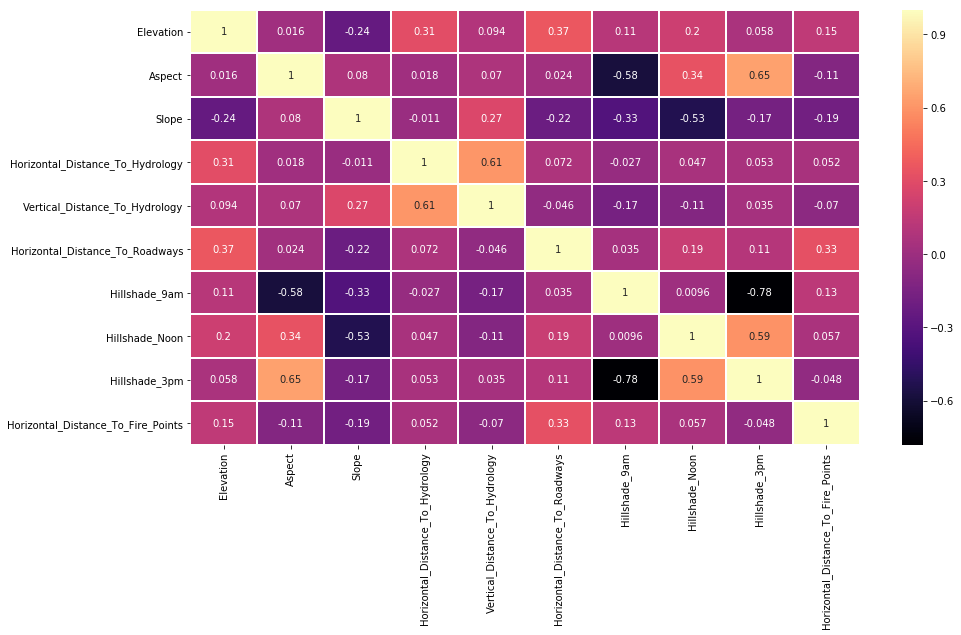

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [48]:
X_train=train.loc[:,'Elevation':'soil_Type 40']
y_train=train['Forest Cover Type']

In [43]:
rem=['Hillshade_3pm','soil_Type 7','soil_Type 8','soil_Type 9','soil_Type 14','soil_Type 15',
     'soil_Type 21','soil_Type 25','soil_Type 27','soil_Type 28','soil_Type 36','soil_Type 37']

In [58]:
X_test=test.loc[:,'Elevation':'soil_Type 40']
#there is no ytest

In [59]:
X_train.drop(rem, axis=1, inplace=True)
X_test.drop(rem, axis=1, inplace=True)

In [60]:
%%time
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

Wall time: 4min 28s


Text(0,0.5,'Accuracy')

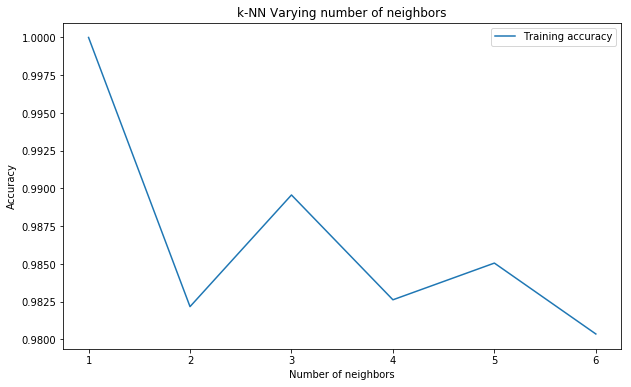

In [65]:
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
#plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors=5) 

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
predicted_classes = knn.predict(X_test)

In [78]:
submissions=pd.DataFrame({"ids": list(range(1,len(predicted_classes) + 1)),
                         "Forest Cover Type": predicted_classes})
submissions.to_csv("Submit1.csv", index=False, header=True)